In [1]:
import os 
import sys
sys.path.append('..')

In [2]:
from scripts.backtest import run_backtest
import matplotlib.pyplot as plt

In [3]:
import pandas as pd

df = pd.read_csv('../data/cleaned/TSLA_cleaned.csv', skiprows=[1,2], parse_dates=[0])
print(df.columns)
print(df.head())


Index(['Price', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume',
       'Ticker', 'Daily_Return', 'Rolling_Std_20', 'Rolling_Mean_50',
       'Log_Return'],
      dtype='object')
       Price  Adj Close      Close       High        Low       Open  \
0 2015-07-01  17.943333  17.943333  18.174667  17.856667  18.073999   
1 2015-07-02  18.667999  18.667999  18.830000  18.220667  18.680000   
2 2015-07-06  18.648001  18.648001  18.779333  18.420000  18.591999   
3 2015-07-07  17.858667  17.858667  18.346666  17.384666  18.333332   
4 2015-07-08  16.997334  16.997334  17.386667  16.954000  17.288000   

      Volume Ticker  Daily_Return  Rolling_Std_20  Rolling_Mean_50  Log_Return  
0   31518000   TSLA           NaN             NaN        17.943333         NaN  
1  107458500   TSLA      0.040386             NaN        18.305666    0.039592  
2   61828500   TSLA     -0.001071        0.029315        18.419778   -0.001072  
3   91576500   TSLA     -0.042328        0.041357        18.2795

In [4]:
start_backtest = "2024-08-01"
end_backtest = "2025-07-31"
#max sharpe
strategy_weights = {
    "TSLA": 1.0883965894553758e-13,  # basically 0
    "BND": 0.5394609408653376,
    "SPY": 0.46053905913455373
}

benchmark_weights = {
    "SPY": 0.6,
    "BND": 0.4
}

results = run_backtest(
    tickers=["TSLA", "SPY", "BND"],
    strategy_weights=strategy_weights,
    start_date=start_backtest,
    end_date=end_backtest,
    strategy_rebalance="hold",       # or "monthly"
    benchmark_rebalance="monthly",   # or "hold"
    risk_free_annual=0.0
)

c:\Users\tsega\Downloads\gmf-timeseries-portfolio-management\notebooks\..\scripts\backtest.py:47: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  prices = prices.fillna(method="ffill").fillna(method="bfill")
c:\Users\tsega\Downloads\gmf-timeseries-portfolio-management\notebooks\..\scripts\backtest.py:83: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  month_ends = prices.resample("M").last().index



=== Backtest Summary ===
Window: 2024-08-01 → 2025-07-30
      Portfolio  total_return     cagr      vol   sharpe    max_dd
       Strategy      0.100378 0.101647 0.098431 1.032519 -0.088348
Benchmark 60/40      0.118665 0.120177 0.121216 0.996478 -0.126153

Saved plot: ../results\backtests\cumulative_strategy_vs_benchmark.png
Saved metrics CSV: ../results\backtests\backtest_metrics.csv
Data dir: ../results\backtests


In [6]:
strategy_ret_df = pd.read_csv("../results/backtests/strategy_daily_returns.csv", index_col=0, parse_dates=True)
print(strategy_ret_df.columns)


Index(['value_or_return'], dtype='object')


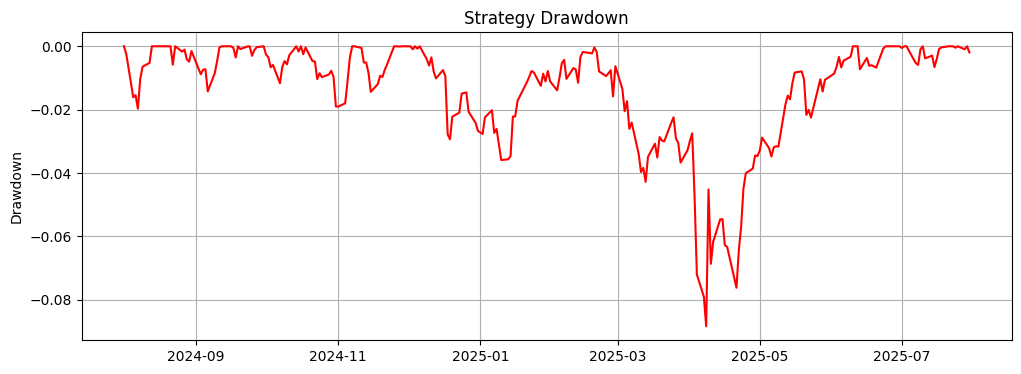

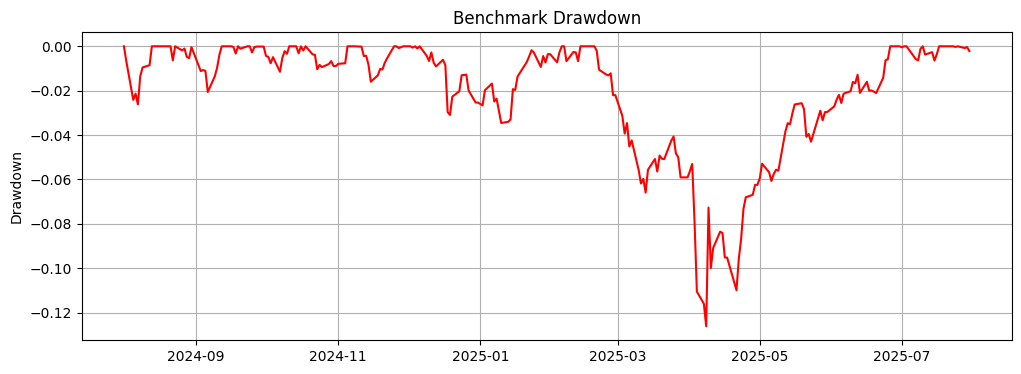

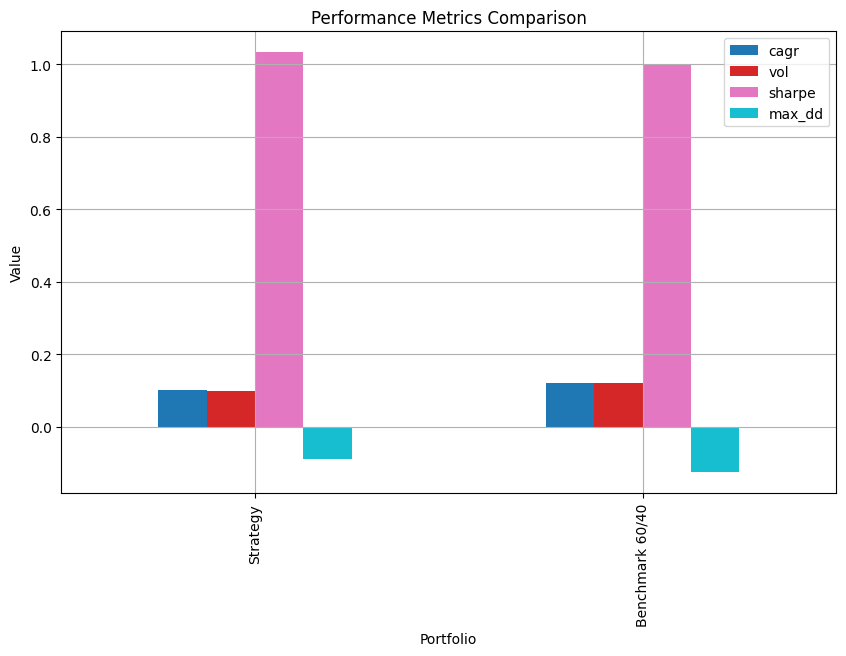

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_drawdowns(returns, title="Drawdowns"):
    cum_returns = (1 + returns).cumprod()
    rolling_max = cum_returns.cummax()
    drawdowns = (cum_returns - rolling_max) / rolling_max

    plt.figure(figsize=(12, 4))
    plt.plot(drawdowns.index, drawdowns.values, label="Drawdown", color='red')
    plt.title(title)
    plt.ylabel("Drawdown")
    plt.grid(True)
    plt.show()

def plot_metrics(metrics_df):
    metrics_df = metrics_df.set_index('Portfolio')
    metrics_df = metrics_df[['cagr', 'vol', 'sharpe', 'max_dd']]
    metrics_df.plot(kind='bar', figsize=(10,6), grid=True, colormap='tab10')
    plt.title("Performance Metrics Comparison")
    plt.ylabel("Value")
    plt.show()

# Usage example:
metrics_df = pd.read_csv("../results/backtests/backtest_metrics.csv")
strategy_ret = pd.read_csv("../results/backtests/strategy_daily_returns.csv", index_col=0, parse_dates=True).iloc[:, 0]
benchmark_ret = pd.read_csv("../results/backtests/benchmark_daily_returns.csv", index_col=0, parse_dates=True).iloc[:, 0]

plot_drawdowns(strategy_ret, "Strategy Drawdown")
plot_drawdowns(benchmark_ret, "Benchmark Drawdown")
plot_metrics(metrics_df)
